In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def draw_line(a, b, x_min=-5, x_max=5, c=(.75, .1, .1, .25)):
    x = np.linspace(x_min, x_max, 1000)
    y = a * x + b
    plt.plot(x, y, "-r", c=c)

In [3]:
xy_df = pd.DataFrame({
    "x": [1, -2, 2, -1, 0],
    "y": [2, -1, 2.5, 0, 1.5]
})

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr = LinearRegression()
lr.fit(xy_df[["x"]], xy_df["y"])

LinearRegression()

/tmp/ipykernel_4403/3270353586.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, "-r", c=c)


(array([0.9]), np.float64(1.0))

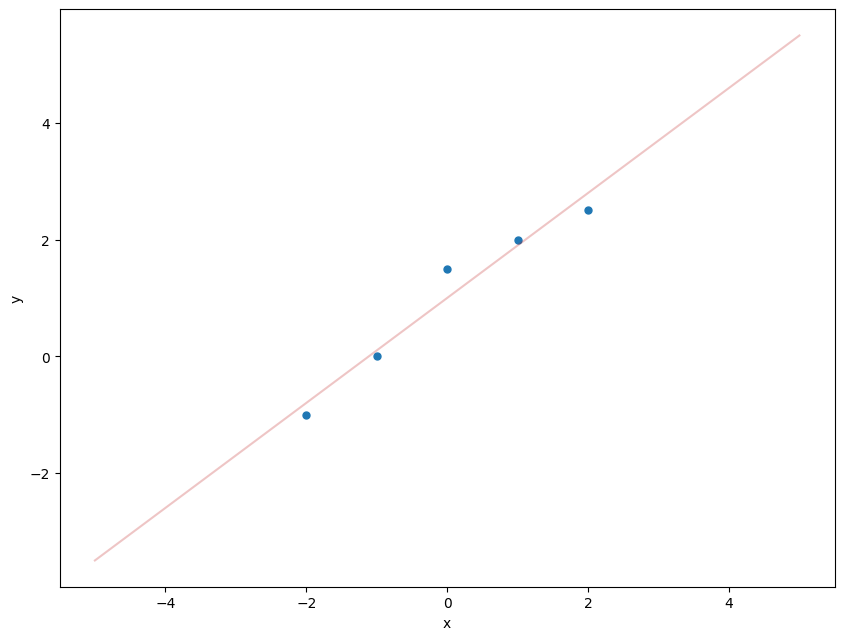

In [7]:
xy_df.plot.scatter(x="x", y="y", s=25, figsize=(10, 7.5))
draw_line(lr.coef_[0], lr.intercept_)
lr.coef_, lr.intercept_

In [8]:
from sklearn.linear_model import Lasso

In [9]:
lasso = Lasso(alpha=1.0)
lasso.fit(xy_df[["x"]], xy_df["y"])

Lasso()

/tmp/ipykernel_4403/3270353586.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, "-r", c=c)


(array([0.4]), np.float64(1.0))

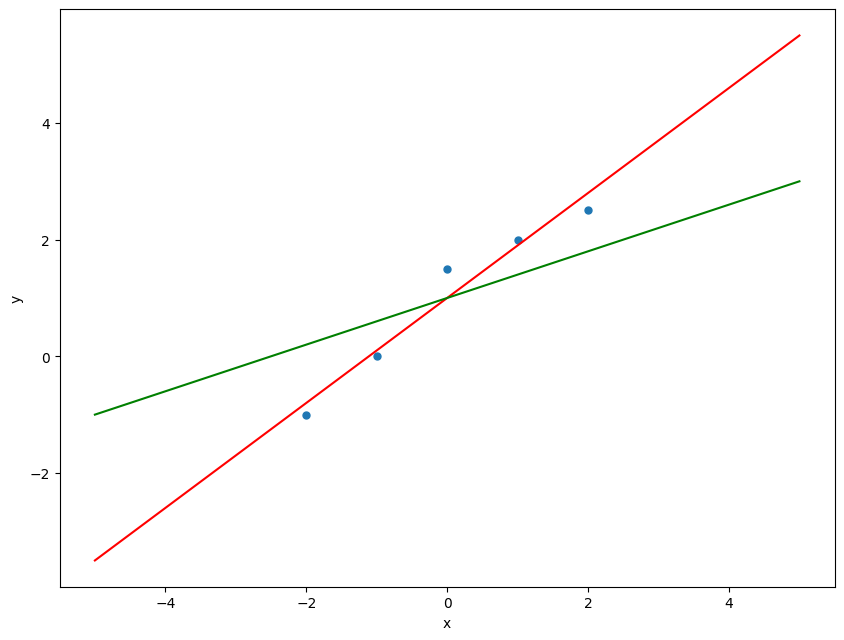

In [13]:
xy_df.plot.scatter(x="x", y="y", s=25, figsize=(10, 7.5))
draw_line(lr.coef_[0], lr.intercept_, c="red")
draw_line(lasso.coef_[0], lasso.intercept_, c="green")
lasso.coef_, lasso.intercept_

In [14]:
from sklearn.linear_model import Ridge

In [15]:
ridge = Ridge(alpha=1.0)
ridge.fit(xy_df[["x"]], xy_df["y"])

Ridge()

/tmp/ipykernel_4403/3270353586.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, "-r", c=c)


(array([0.81818182]), np.float64(1.0))

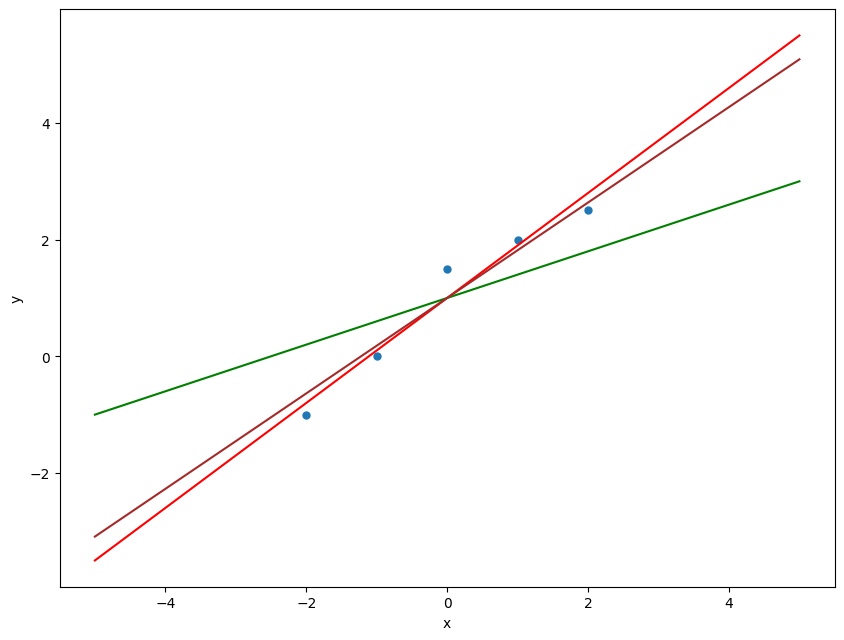

In [16]:
xy_df.plot.scatter(x="x", y="y", s=25, figsize=(10, 7.5))
draw_line(lr.coef_[0], lr.intercept_, c="red")
draw_line(lasso.coef_[0], lasso.intercept_, c="green")
draw_line(ridge.coef_[0], ridge.intercept_, c="brown")
ridge.coef_, lasso.intercept_

### Regularyzacja w wielu wymiarach

In [18]:
wine_quality_df = pd.read_parquet("./data/winequality.parquet")
wine_quality_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_red,color_white,bound sulfur dioxide
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,True,False,23.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,True,False,42.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,True,False,39.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,True,False,43.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,True,False,23.0


In [19]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(wine_quality_df, test_size=0.2)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [21]:
lr_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("lr", LinearRegression()),
    
])
lr_pipeline.fit(train_df.drop("quality", axis="columns"), train_df["quality"])

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [24]:
lasso_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("lasso", Lasso(alpha=0.01)),
])
lasso_pipeline.fit(train_df.drop("quality", axis="columns"), train_df["quality"])

Pipeline(steps=[('scaler', StandardScaler()), ('lasso', Lasso(alpha=0.01))])

In [25]:
ridge_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=0.01)),
])
ridge_pipeline.fit(train_df.drop("quality", axis="columns"), train_df["quality"])

Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge(alpha=0.01))])

In [28]:
weights_df = pd.DataFrame({
    "column_name": train_df.drop("quality", axis="columns").columns,
    "linear_regression": lr_pipeline.steps[1][1].coef_,
    "ridge_regression": ridge_pipeline.steps[1][1].coef_,
    "lasso_regression": lasso_pipeline.steps[1][1].coef_,
})

In [29]:
weights_df


,column_name,linear_regression,ridge_regression,lasso_regression
0,fixed acidity,0.087414,0.087408,-0.000000
1,volatile acidity,-0.227811,-0.227810,-0.204562
2,citric acid,-0.009022,-0.009022,-0.000000
3,residual sugar,0.270277,0.270266,0.082919
4,chlorides,-0.034185,-0.034186,-0.027335
5,free sulfur dioxide,0.065729,0.065729,0.049669
6,total sulfur dioxide,-0.019378,-0.019379,-0.000000
7,density,-0.270711,-0.270695,-0.000000
8,pH,0.068748,0.068744,0.012047
9,sulphates,0.101409,0.101408,0.073866
